# Stefan Spataro

## Research question/interests

**How does the stock price of a tech company compare to the stock price of its competitors at a certain time?** For example, if Apple (AAPL: NASDAQ) and Microsoft (MSFT: NASDAQ) have common price increases, and say APPL increases by 10%, could we discover more details about the market price of MSFT? Factors we could analyze could be the difference in price increases, volume of stocks traded, and time of continuously increasing prices. This data analysis could output relevant results to help investors make decisions when researching opportunities in the tech sector. After conducting an EDA into both MSFT and AAPL dataframes, I realize I may not be able to discover as much information as I previously thought. However, my goal is to analyze more into the percent change between the two companies to discover more information about their relation.

**imports:** pandas, numpy, seaborn

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

**Import data**

In [2]:
df1 = pd.read_csv("../data/raw/AAPL.csv")
df1

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-01-04,7.622500,7.660714,7.585000,7.643214,6.515213,493729600
1,2010-01-05,7.664286,7.699643,7.616071,7.656429,6.526476,601904800
2,2010-01-06,7.656429,7.686786,7.526786,7.534643,6.422664,552160000
3,2010-01-07,7.562500,7.571429,7.466071,7.520714,6.410790,477131200
4,2010-01-08,7.510714,7.571429,7.466429,7.570714,6.453412,447610800
...,...,...,...,...,...,...,...
3266,2022-12-22,134.350006,134.559998,130.300003,132.229996,132.229996,77852100
3267,2022-12-23,130.919998,132.419998,129.639999,131.860001,131.860001,63814900
3268,2022-12-27,131.380005,131.410004,128.720001,130.029999,130.029999,69007800
3269,2022-12-28,129.669998,131.029999,125.870003,126.040001,126.040001,85438400


In [3]:
df2 = pd.read_csv("../data/raw/MSFT.csv")
df2

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-01-04,30.620001,31.100000,30.590000,30.950001,23.683071,38409100
1,2010-01-05,30.850000,31.100000,30.639999,30.959999,23.690725,49749600
2,2010-01-06,30.879999,31.080000,30.520000,30.770000,23.545338,58182400
3,2010-01-07,30.629999,30.700001,30.190001,30.450001,23.300467,50559700
4,2010-01-08,30.280001,30.879999,30.240000,30.660000,23.461161,51197400
...,...,...,...,...,...,...,...
3266,2022-12-22,241.259995,241.990005,233.869995,238.190002,238.190002,28651700
3267,2022-12-23,236.110001,238.869995,233.940002,238.729996,238.729996,21207000
3268,2022-12-27,238.699997,238.929993,235.830002,236.960007,236.960007,16688600
3269,2022-12-28,236.889999,239.720001,234.169998,234.529999,234.529999,17457100


In [4]:
df1.shape

(3271, 7)

In [5]:
df2.shape

(3271, 7)

In [6]:
df1.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-01-04,7.622500,7.660714,7.585000,7.643214,6.515213,493729600
1,2010-01-05,7.664286,7.699643,7.616071,7.656429,6.526476,601904800
2,2010-01-06,7.656429,7.686786,7.526786,7.534643,6.422664,552160000
3,2010-01-07,7.562500,7.571429,7.466071,7.520714,6.410790,477131200
4,2010-01-08,7.510714,7.571429,7.466429,7.570714,6.453412,447610800


In [7]:
df2.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-01-04,30.620001,31.100000,30.590000,30.950001,23.683071,38409100
1,2010-01-05,30.850000,31.100000,30.639999,30.959999,23.690725,49749600
2,2010-01-06,30.879999,31.080000,30.520000,30.770000,23.545338,58182400
3,2010-01-07,30.629999,30.700001,30.190001,30.450001,23.300467,50559700
4,2010-01-08,30.280001,30.879999,30.240000,30.660000,23.461161,51197400


In [8]:
df1.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

In [9]:
df2.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

**open/closing:** narrow down graph to date, open, close, and pct_change columns

In [10]:
df1['Open'].unique()

array([  7.6225  ,   7.664286,   7.656429, ..., 131.380005, 129.669998,
       127.989998])

In [11]:
df2['Open'].unique()

array([ 30.620001,  30.85    ,  30.879999, ..., 238.699997, 236.889999,
       235.649994])

In [12]:
df1['Close'].unique()

array([  7.643214,   7.656429,   7.534643, ..., 130.029999, 126.040001,
       129.610001])

In [13]:
df2['Close'].unique()

array([ 30.950001,  30.959999,  30.77    , ..., 236.960007, 234.529999,
       241.009995])

*change:* referenced: https://practicaldatascience.co.uk/data-science/how-to-calculate-percentage-change-between-columns-in-pandas#:~:text=Pandas%2C%20rather%20helpfully%2C%20includes%20a,one%20row%20and%20the%20next.

In [14]:
df1['pct_change'] = df1[['Open', 'Close']].pct_change(axis=1)['Close']
df1 = df1.loc[:,['Date', 'Open', 'Close', 'pct_change']]
df1

,Date,Open,Close,pct_change
0,2010-01-04,7.622500,7.643214,0.002717
1,2010-01-05,7.664286,7.656429,-0.001025
2,2010-01-06,7.656429,7.534643,-0.015906
3,2010-01-07,7.562500,7.520714,-0.005525
4,2010-01-08,7.510714,7.570714,0.007989
...,...,...,...,...
3266,2022-12-22,134.350006,132.229996,-0.015780
3267,2022-12-23,130.919998,131.860001,0.007180
3268,2022-12-27,131.380005,130.029999,-0.010276
3269,2022-12-28,129.669998,126.040001,-0.027994


In [15]:
df2['pct_change'] = df2[['Open', 'Close']].pct_change(axis=1)['Close']
df2 = df2.loc[:,['Date', 'Open', 'Close', 'pct_change']]
df2

,Date,Open,Close,pct_change
0,2010-01-04,30.620001,30.950001,0.010777
1,2010-01-05,30.850000,30.959999,0.003566
2,2010-01-06,30.879999,30.770000,-0.003562
3,2010-01-07,30.629999,30.450001,-0.005877
4,2010-01-08,30.280001,30.660000,0.012550
...,...,...,...,...
3266,2022-12-22,241.259995,238.190002,-0.012725
3267,2022-12-23,236.110001,238.729996,0.011097
3268,2022-12-27,238.699997,236.960007,-0.007289
3269,2022-12-28,236.889999,234.529999,-0.009962


**greatest change:**
referenced: https://sparkbyexamples.com/pandas/pandas-get-index-from-dataframe/#:~:text=You%20can%20get%20the%20Index,DataFrame%20to%20get%20the%20index.

In [16]:
big_apple = df1['pct_change'].max()
big_apple

0.08696110100301047

In [17]:
big_microsoft = df2['pct_change'].max()
big_microsoft

0.08102449521028587

In [18]:
d = np.where(df1['pct_change'] == big_apple)
d[0][0]

1419

In [19]:
d = np.where(df2['pct_change'] == big_microsoft)
d[0][0]

3057

**30-Day moving averages:** the average price of the recent 30 days

In [20]:
df1['30D move'] = df1['Close'].rolling(window=30).mean()
df1

,Date,Open,Close,pct_change,30D move
0,2010-01-04,7.622500,7.643214,0.002717,NaN
1,2010-01-05,7.664286,7.656429,-0.001025,NaN
2,2010-01-06,7.656429,7.534643,-0.015906,NaN
3,2010-01-07,7.562500,7.520714,-0.005525,NaN
4,2010-01-08,7.510714,7.570714,0.007989,NaN
...,...,...,...,...,...
3266,2022-12-22,134.350006,132.229996,-0.015780,144.147332
3267,2022-12-23,130.919998,131.860001,0.007180,143.646999
3268,2022-12-27,131.380005,130.029999,-0.010276,142.991333
3269,2022-12-28,129.669998,126.040001,-0.027994,142.249999


In [21]:
df2['30D move'] = df2['Close'].rolling(window=30).mean()
df2

,Date,Open,Close,pct_change,30D move
0,2010-01-04,30.620001,30.950001,0.010777,NaN
1,2010-01-05,30.850000,30.959999,0.003566,NaN
2,2010-01-06,30.879999,30.770000,-0.003562,NaN
3,2010-01-07,30.629999,30.450001,-0.005877,NaN
4,2010-01-08,30.280001,30.660000,0.012550,NaN
...,...,...,...,...,...
3266,2022-12-22,241.259995,238.190002,-0.012725,246.168666
3267,2022-12-23,236.110001,238.729996,0.011097,246.026999
3268,2022-12-27,238.699997,236.960007,-0.007289,245.688666
3269,2022-12-28,236.889999,234.529999,-0.009962,245.454666


**cleaned up columns with null values**

In [22]:
df1 = df1.tail(df1.shape[0] - 29)
df1

,Date,Open,Close,pct_change,30D move
29,2010-02-16,7.212143,7.264286,0.007230,7.275952
30,2010-02-17,7.292500,7.233929,-0.008032,7.262310
31,2010-02-18,7.201071,7.247500,0.006448,7.248679
32,2010-02-19,7.209286,7.202500,-0.000941,7.237607
33,2010-02-22,7.226429,7.157857,-0.009489,7.225512
...,...,...,...,...,...
3266,2022-12-22,134.350006,132.229996,-0.015780,144.147332
3267,2022-12-23,130.919998,131.860001,0.007180,143.646999
3268,2022-12-27,131.380005,130.029999,-0.010276,142.991333
3269,2022-12-28,129.669998,126.040001,-0.027994,142.249999


In [23]:
df2 = df2.tail(df2.shape[0] - 29)
df2

,Date,Open,Close,pct_change,30D move
29,2010-02-16,28.129999,28.350000,0.007821,29.409000
30,2010-02-17,28.530001,28.590000,0.002103,29.330333
31,2010-02-18,28.590000,28.969999,0.013291,29.264000
32,2010-02-19,28.790001,28.770000,-0.000695,29.197333
33,2010-02-22,28.840000,28.730000,-0.003814,29.140000
...,...,...,...,...,...
3266,2022-12-22,241.259995,238.190002,-0.012725,246.168666
3267,2022-12-23,236.110001,238.729996,0.011097,246.026999
3268,2022-12-27,238.699997,236.960007,-0.007289,245.688666
3269,2022-12-28,236.889999,234.529999,-0.009962,245.454666


**30 Day average chart over time:**

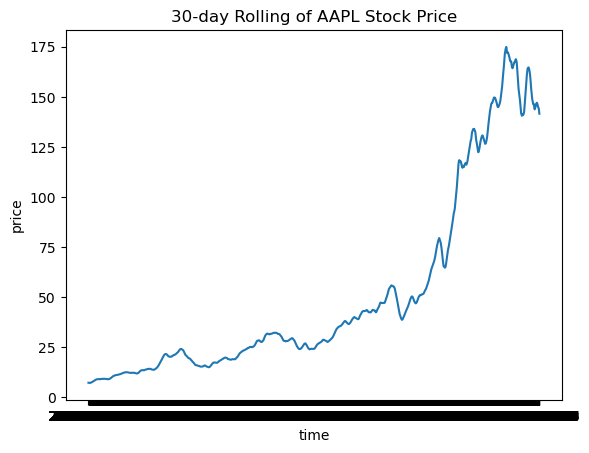

In [25]:
plt.plot(df1['Date'], df1['30D move'])
plt.title('30-day Rolling of AAPL Stock Price')
plt.xlabel('time')
plt.ylabel('price')
plt.show()

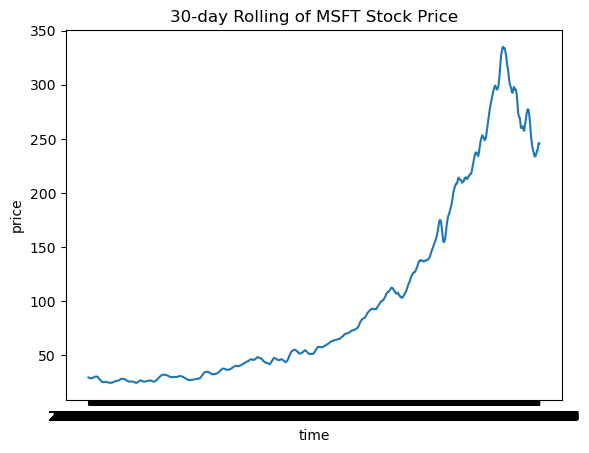

In [26]:
plt.plot(df2['Date'], df2['30D move'])
plt.title('30-day Rolling of MSFT Stock Price')
plt.xlabel('time')
plt.ylabel('price')
plt.show()

**price percent change difference:**

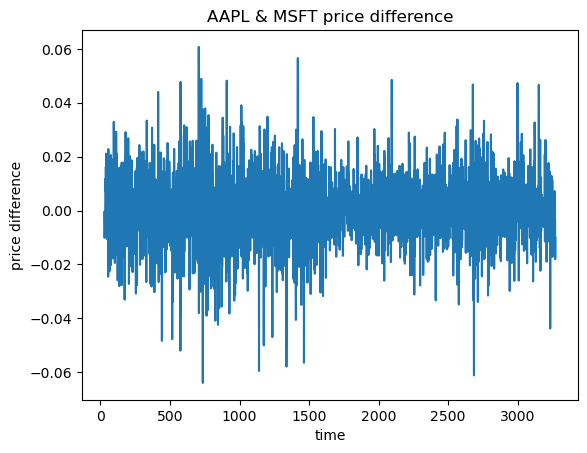

In [31]:
compare = df1['pct_change'].compare(df2['pct_change'])
plt.plot(compare.index, compare['self'] - compare['other'])
plt.title('AAPL & MSFT price difference')
plt.xlabel('time')
plt.ylabel('price difference')
plt.show()

**summary:**
after comparing the 30 day rolling prices of AAPL and MSFT, I will be able to further analyze the difference in percent change between the two companies. This can provide insight into whether there was a tech industry incline, or a competition between the AAPL and MSFT.